<a href="https://colab.research.google.com/github/Thorne-Musau/np/blob/main/Boolean_Logic%2C_Comparisons_and_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Comparison Operators as ufuncs

In Computation on NumPy Arrays: Universal Functions we introduced ufuncs, and focused in particular on arithmetic operators. We saw that using +, -, *, /, and others on arrays leads to element-wise operations. NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type.

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write x < 3, internally NumPy uses np.less(x, 3). A summary of the comparison operators and their equivalent ufunc is shown here:

Operator	Equivalent ufunc		Operator	Equivalent ufunc

==	np.equal		!=	np.not_equal
<	np.less		<=	np.less_equal
(>)	np.greater		>=	np.greater_equal

In [3]:
# Example of this:
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [5]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

We use the np ufunc operator equivalents when dealing with large data because of computational times and cases of multidimensional arrays

## Counting entries
np.count_nonzero func is useful where it counts the number of trues

In [9]:
# Example
np.count_nonzero(x)

11

In [10]:
# Count values less than 6
np.count_nonzero(x <6)

8

In [11]:
# How many values in each row are less than 6
np.count_nonzero(x < 6 , axis=1)

array([4, 2, 2])

Checking whether all values are true:
We use the np.all or the np.any funcs

In [12]:
# Are there any values greater than 7?
np.any(x>7)

True

In [13]:
# are there any values less than zero?
np.any(x < 0)

False

Can also be used along particular axes too

In [14]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

# Bool Operators
Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

Operator	Equivalent ufunc		Operator	Equivalent ufunc
& - np.bitwise_and		|	- np.bitwise_or
^	- np.bitwise_xor		~	- np.bitwise_not

## Rainy days example

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
!ls 'drive/My Drive/Dataset/Seattle2014.csv'

'drive/My Drive/Dataset/Seattle2014.csv'


In [20]:
dataset = pd.read_csv('drive/My Drive/Dataset/Seattle2014.csv')['PRCP'].values
df =dataset.copy()
df

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [22]:
inches = df /254.0
inches.shape

(365,)

In [25]:
# Using bool operators, we can sort a copound question
np.sum ((inches > 0.5) & (inches < 1))
 # where inches is greater than or equal to o.5 and less than 1

29

In [26]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Masking
Boolean arrays as masks is used to select particular subsets of the data themselves.

In [27]:
# mask of all rainy days
rainy = (inches > 0)

In [28]:
# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

In [29]:
print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

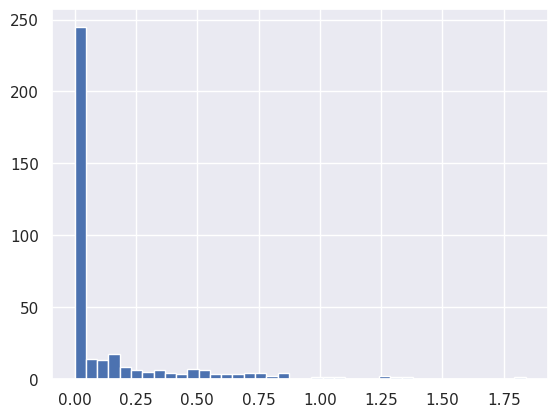

In [31]:
plt.hist(inches , 40);